Angel Josue Mazariegos Guzman 19000522 - Sección V

### Ciencia de Datos en Python

# Proyecto #1

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import copy


---
## **2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).**

In [2]:
dataset = np.load('proyecto_training_data.npy')

dataset_entrenamiento = np.random.choice(dataset.shape[0], size=1168, replace=False)
dataset_validacion = np.setdiff1d(np.arange(dataset.shape[0]), dataset_entrenamiento)

dataset_entrenamiento = dataset[dataset_entrenamiento, :]
dataset_validacion = dataset[dataset_validacion, :]

---
## **3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas)**

- **Media**

In [226]:
media = np.nanmean(dataset, axis=0)
print("Media de cada columna:")
print("SalePrice: ", media[0])
print("OverallQual: ", media[1])
print("1stFlrSF: ", media[2])
print("TotRmsAbvGrd: ", media[3])
print("YearBuilt: ", media[4])
print("LotFrontage: ", media[5])

Media de cada columna:
SalePrice:  180921.19589041095
OverallQual:  6.0993150684931505
1stFlrSF:  1162.626712328767
TotRmsAbvGrd:  6.517808219178082
YearBuilt:  1971.267808219178
LotFrontage:  70.04995836802665


 - **Valor maximo**

In [227]:
valor_max = np.nanmax(dataset, axis=0)
print("Valor maximo de cada columna:")
print("SalePrice: ", valor_max[0])
print("OverallQual: ", valor_max[1])
print("1stFlrSF: ", valor_max[2])
print("TotRmsAbvGrd: ", valor_max[3])
print("YearBuilt: ", valor_max[4])
print("LotFrontage: ", valor_max[5])

Valor maximo de cada columna:
SalePrice:  755000.0
OverallQual:  10.0
1stFlrSF:  4692.0
TotRmsAbvGrd:  14.0
YearBuilt:  2010.0
LotFrontage:  313.0


- **Valor minimo**

In [228]:
valor_min = np.nanmin(dataset, axis=0)
print("Valor minimo de cada columna:")
print("SalePrice: ", valor_min[0])
print("OverallQual: ", valor_min[1])
print("1stFlrSF: ", valor_min[2])
print("TotRmsAbvGrd: ", valor_min[3])
print("YearBuilt: ", valor_min[4])
print("LotFrontage: ", valor_min[5])

Valor minimo de cada columna:
SalePrice:  34900.0
OverallQual:  1.0
1stFlrSF:  334.0
TotRmsAbvGrd:  2.0
YearBuilt:  1872.0
LotFrontage:  21.0


- **Rango (peak to peak)**

In [229]:
rango = valor_max - valor_min
print("Rango de cada columna:")
print("SalePrice: ", rango[0])
print("OverallQual: ", rango[1])
print("1stFlrSF: ", rango[2])
print("TotRmsAbvGrd: ", rango[3])
print("YearBuilt: ", rango[4])
print("LotFrontage: ", rango[5])

Rango de cada columna:
SalePrice:  720100.0
OverallQual:  9.0
1stFlrSF:  4358.0
TotRmsAbvGrd:  12.0
YearBuilt:  138.0
LotFrontage:  292.0


- **Desviacion estandar**

In [230]:
desviacion = np.nanstd(dataset_entrenamiento, axis=0, ddof=1)
print("Desviacion estandar de cada columna:")
print("SalePrice: ", desviacion[0])
print("OverallQual: ", desviacion[1])
print("1stFlrSF: ", desviacion[2])
print("TotRmsAbvGrd: ", desviacion[3])
print("YearBuilt: ", desviacion[4])
print("LotFrontage: ", desviacion[5])

Desviacion estandar de cada columna:
SalePrice:  78774.53920735973
OverallQual:  1.376660304648093
1stFlrSF:  387.998494643343
TotRmsAbvGrd:  1.619292428547627
YearBuilt:  29.62468212545522
LotFrontage:  24.437352648625087


---
## **4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.**

In [231]:
d = { 'SalePrice': dataset[:, 0],
      'OverallQual': dataset[:, 1],
      '1stFlrSF': dataset[:, 2],
      'TotRmsAbvGrd': dataset[:, 3],
      'YearBuilt': dataset[:, 4],
      'LotFrontage': dataset[:, 5]
     }

df = pd.DataFrame(d)

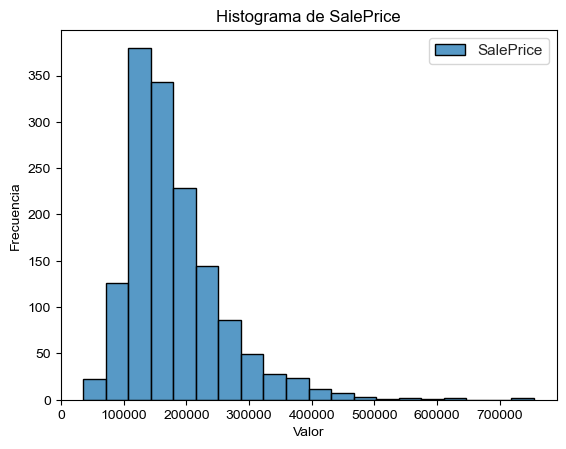

In [232]:
sns.histplot(df["SalePrice"], kde=False, bins=20, label='SalePrice')

sns.set(style="whitegrid")
plt.title('Histograma de SalePrice')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

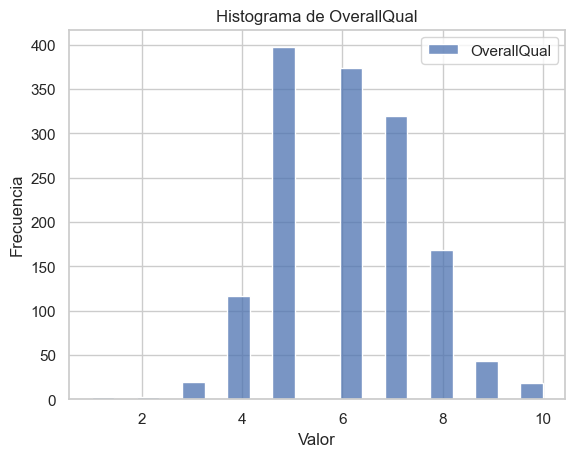

In [233]:
sns.histplot(df["OverallQual"], kde=False, bins=20, label='OverallQual')

sns.set(style="whitegrid")
plt.title('Histograma de OverallQual')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

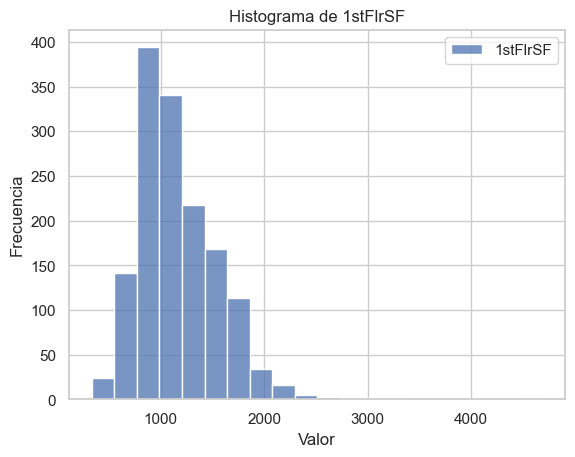

In [240]:
sns.histplot(df["1stFlrSF"], kde=False, bins=20, label='1stFlrSF')

sns.set(style="whitegrid")
plt.title('Histograma de 1stFlrSF')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

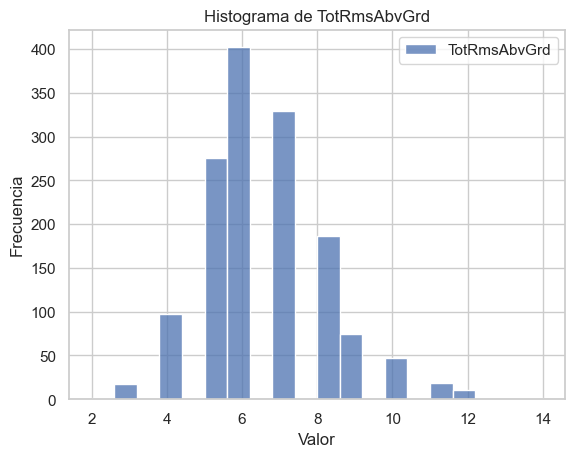

In [241]:
sns.histplot(df["TotRmsAbvGrd"], kde=False, bins=20, label='TotRmsAbvGrd')

sns.set(style="whitegrid")
plt.title('Histograma de TotRmsAbvGrd')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

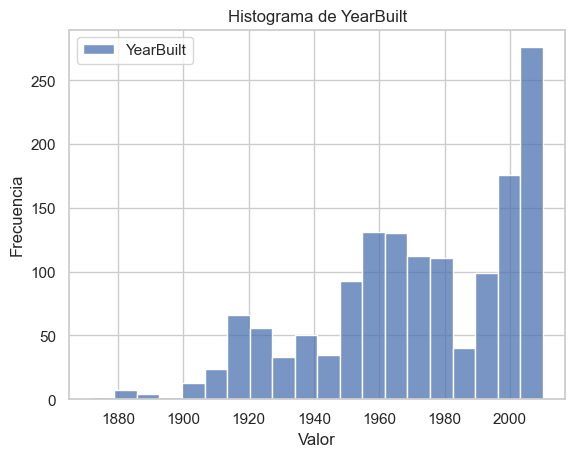

In [242]:
sns.histplot(df["YearBuilt"], kde=False, bins=20, label='YearBuilt')

sns.set(style="whitegrid")
plt.title('Histograma de YearBuilt')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

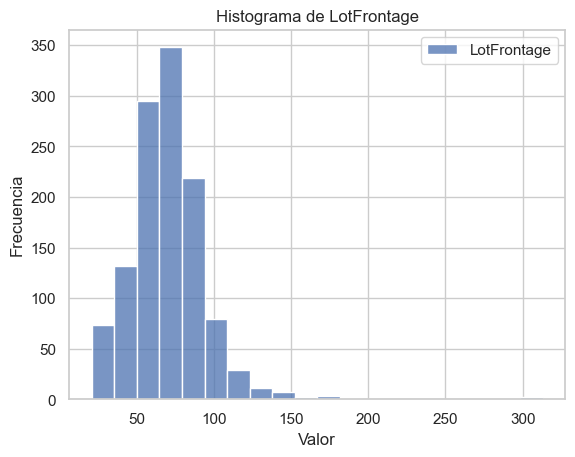

In [243]:
sns.histplot(df["LotFrontage"], kde=False, bins=20, label='LotFrontage')

sns.set(style="whitegrid")
plt.title('Histograma de LotFrontage')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

---
## **5. Para cada variable independiente x :**
- **Calcular el coeficiente de correlación entre x y y.**
- **Graficar x vs y (scatterplot) usando matplotlib.**
- **Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.**

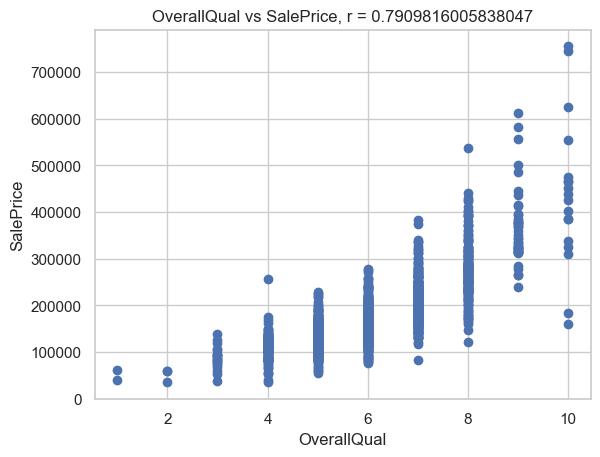

In [244]:
coef_correlacion1 = df['OverallQual'].corr(df['SalePrice'])

plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'OverallQual vs SalePrice, r = {coef_correlacion1}')
plt.grid(True)
plt.show()

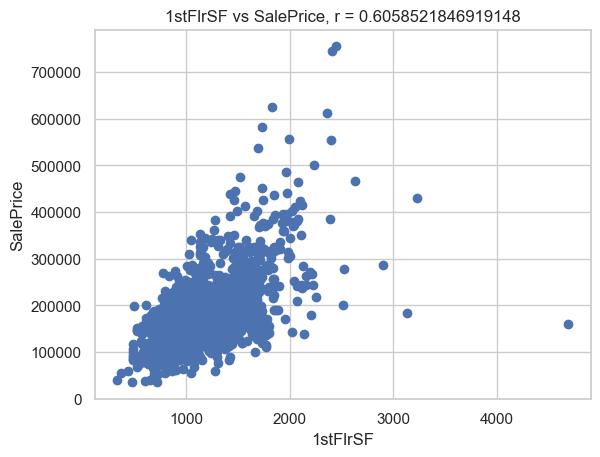

In [246]:
coef_correlacion2 = df['1stFlrSF'].corr(df['SalePrice'])

plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'1stFlrSF vs SalePrice, r = {coef_correlacion2}')
plt.grid(True)
plt.show()

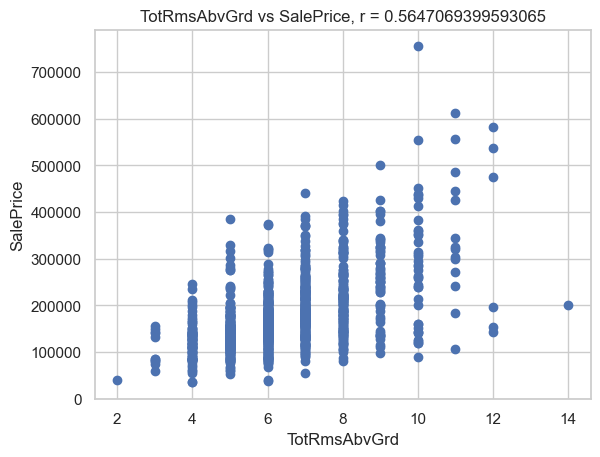

In [42]:
coef_correlacion3 = df['TotRmsAbvGrd'].corr(df['SalePrice'])

plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'TotRmsAbvGrd vs SalePrice, r = {coef_correlacion3}')
plt.grid(True)
plt.show()

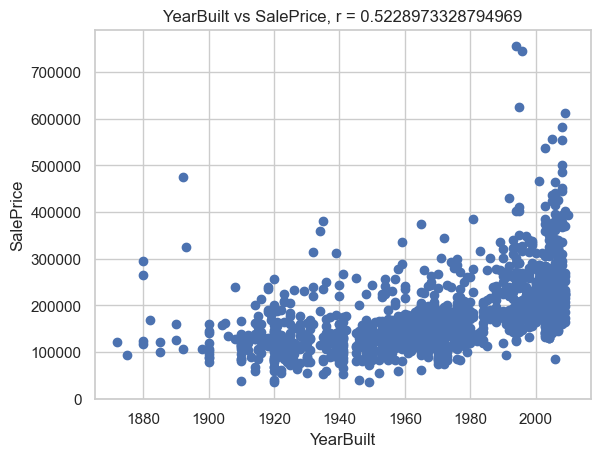

In [247]:
coef_correlacion4 = df['YearBuilt'].corr(df['SalePrice'])

plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'YearBuilt vs SalePrice, r = {coef_correlacion4}')
plt.grid(True)
plt.show()

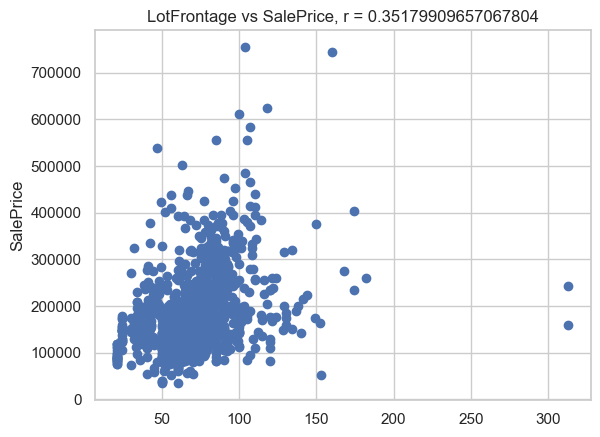

In [248]:
coef_correlacion5 = df['LotFrontage'].corr(df['SalePrice'])

plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.xlabel('')
plt.ylabel('SalePrice')
plt.title(f'LotFrontage vs SalePrice, r = {coef_correlacion5}')
plt.grid(True)
plt.show()

- **Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
  con más potencial predictivo es decir las 2 variables que presentan mayor correlación
  entre dicha variable y la variable dependiente.**
  
Los valores con mayor coeficiente de correlación:
  - **OverallQual vs SalePrice = 0.79098**
  - **1stFlrSF vs SalePrice = 0.60585**

---
## **6. Funciones**

**Funcion para entrenar el modelo de regresión lineal de una variable y = β0 +β1 ∗ x.**

In [353]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    X = np.column_stack((x, np.ones(len(x))))

    beta = np.zeros(2)
    #beta = np.array([153.05743944, 9.65952335])  #1stFlrSF
    #beta = np.array([44981.11092649, -94113.55673411]) #OverallQual
    
    errores = []
    almacen_it = []
    almacen_it.append(copy.deepcopy(beta))
    
    for epoch in range(1, epochs+1):
        y_hat = np.dot(X, beta)
        
        error = (y_hat - y)**2
        error = np.mean(error)
        error = error/(2)
        errores.append(error)

        gradiente_beta1 = np.mean((y_hat - y) * X[:, 0])
        gradiente_beta0 = np.mean(y_hat - y)

        beta[0] -= alpha * gradiente_beta1
        beta[1] -= alpha * gradiente_beta0
        almacen_it.append(copy.deepcopy(beta))
        
        if epoch % imprimir_error_cada == 0:
             print(f"Iteración {epoch}: Error = {error}, beta: {beta}")
        
    return almacen_it, errores

**Función para graficar errores**

Con esta función podemos ver cómo cambia el error en el tiempo

In [354]:
def grafic_error(errores):
    num_iteraciones = len(errores)
    
    iteraciones = np.arange(1, num_iteraciones + 1)
    
    plt.figure(figsize=(15, 7))
    plt.plot(iteraciones, errores, marker='o', linestyle='-')
    plt.title('Error')
    plt.xlabel('Número de iteración')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()

**Funcion para graficar el modelo**

Con esta función podemos analaizar cómo evoluciona el modelo graficando las rectas que representan la predicción del precio de las viviendas

In [355]:
def graficar_evolucion_modelo(beta, x, n):
    plt.figure(figsize=(12, 8))
    
    betas = beta[::int(n)]
    betas = np.array(betas)
    
    for i in range(len(betas)):
        y = betas[i, 0] * x + betas[i, 1]
        plt.plot(x, y)  # Etiqueta con el número de la recta

    plt.xlabel('Eje X')
    plt.ylabel('Precio de la vivienda')
    plt.title('Visualizacion de evolucion de modelo de entrenamiento')
    plt.grid(True)
    plt.show()

**Funcion para predecir los precios de la casa**

In [356]:
def predecir(beta_entrena, modelo_scikit, x):
    X = np.column_stack((x, np.ones(len(x))))
    
    beta_entrena= np.array(beta_entrena)
    
    scikit_b0 = modelo_scikit.intercept_
    scikit_b1 = modelo_scikit.coef_[0]
    
    beta1 = (scikit_b1 + beta_entrena[0])/2
    beta0 = (scikit_b0 + beta_entrena[1])/2
    
    beta = np.array([beta1,beta0])
    
    y_hat1 = np.dot(X, beta_entrena)
    y_hat2 = modelo_scikit.predict(x.reshape(-1,1)) 
    y_hat3 = np.dot(X, beta)
    
    df = pd.DataFrame({
    'Modelo Entrenamiento': y_hat1,
    'Modelo Scikit-Learn': y_hat2,
    'Promedio': y_hat3
    })
    
    print(f"Modelo entrenamiento beta1 = {beta_entrena[0]}  y beta0 = {beta_entrena[1]}")
    print(f"Modelo Scikit-Learn beta1 = {scikit_b1}  y beta0 = {scikit_b0}")
    print(f"Promedio beta1 = {beta[0]}  y beta0 = {beta[1]}")
    
    return df

---
## **Poniendo a prueba el modelo:**

### Prediccion usando **1stFlrSF vs SalePrice**

Utilizamos la función de entrenamiento:

In [386]:
beta_final_1stFlrSF, errores= entrenar_regresion_lineal(dataset_entrenamiento[:,2], dataset_entrenamiento[:,0], 24000, 2000, 0.00000132)
print("Parámetros finales del modelo:", beta_final_1stFlrSF[-1])

Iteración 2000: Error = 1989535199.2865932, beta: [153.05743944   9.65952335]
Iteración 4000: Error = 1989500733.8444088, beta: [153.05011603  19.19832262]
Iteración 6000: Error = 1989466286.532474, beta: [153.042751    28.73461282]
Iteración 8000: Error = 1989431857.3397987, beta: [153.0353879   38.26839465]
Iteración 10000: Error = 1989397446.256852, beta: [153.02802675  47.79966877]
Iteración 12000: Error = 1989363053.2741084, beta: [153.02066753  57.32843584]
Iteración 14000: Error = 1989328678.3820474, beta: [153.01331024  66.85469651]
Iteración 16000: Error = 1989294321.5711536, beta: [153.00595489  76.37845146]
Iteración 18000: Error = 1989259982.8319159, beta: [152.99860147  85.89970133]
Iteración 20000: Error = 1989225662.1548285, beta: [152.99124999  95.41844679]
Iteración 22000: Error = 1989191359.530391, beta: [152.98390045 104.93468849]
Iteración 24000: Error = 1989157074.9491076, beta: [152.97655283 114.44842709]
Parámetros finales del modelo: [152.97655283 114.44842709]


.


Graficamos el listado de errores obtenido con la función anterior para poder analizar cómo cambia el error con cada iteración realizada

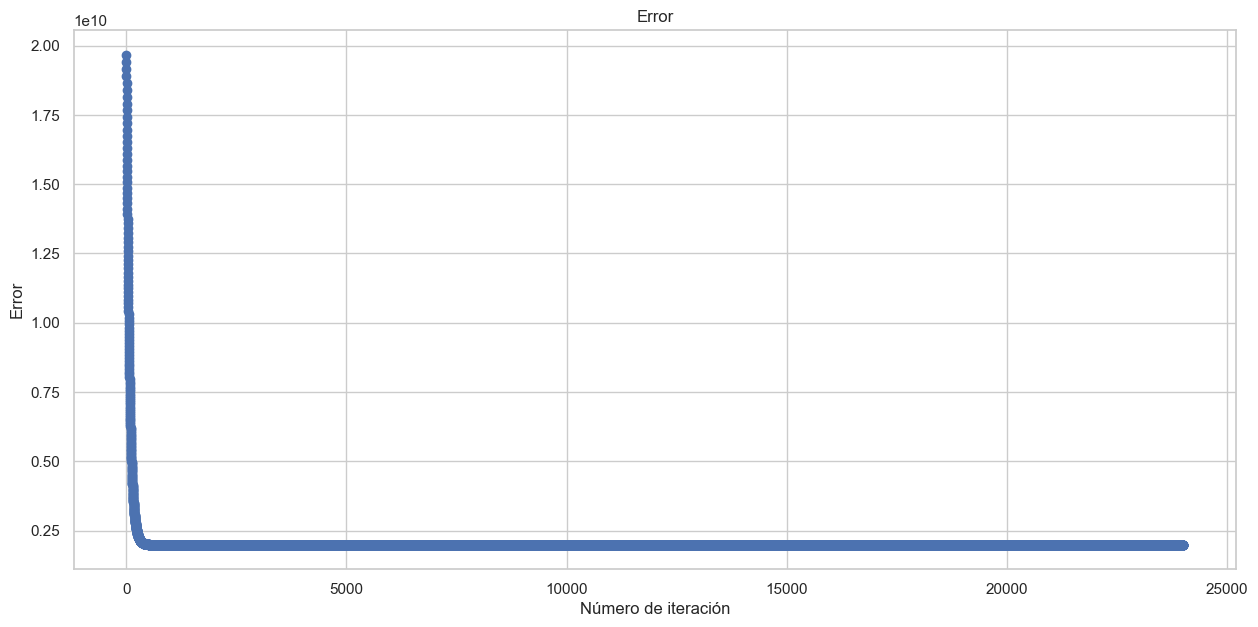

In [358]:
grafic_error(errores)

.

Ahora vamos a observar cómo nuestro modelo va evolucionando con cada iteración realizada:

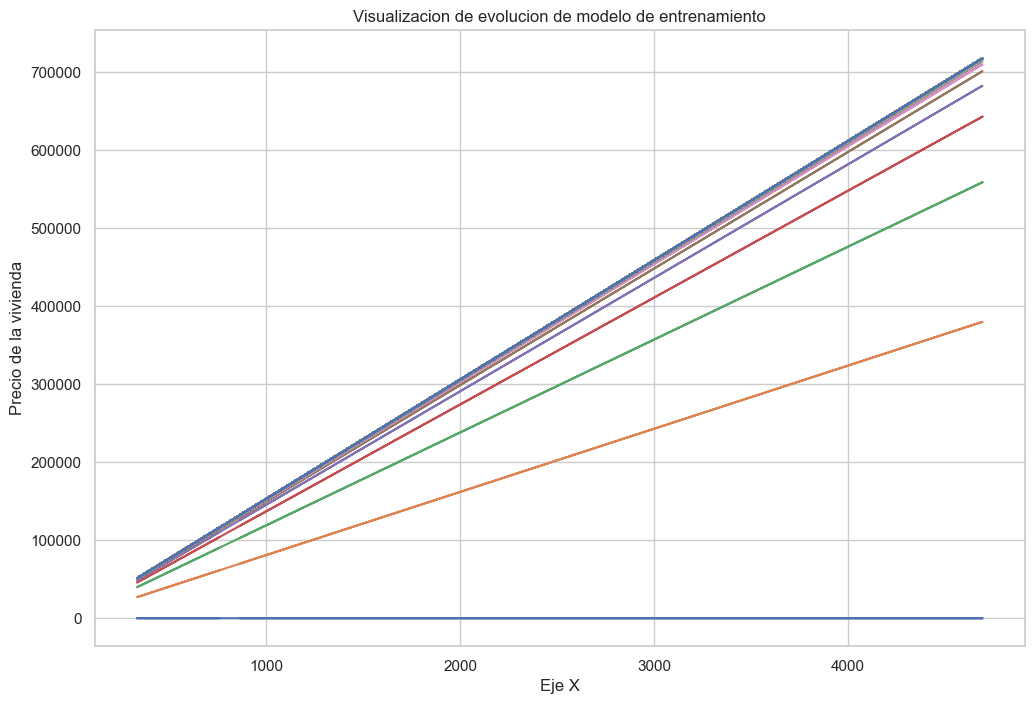

In [359]:
graficar_evolucion_modelo(beta_final_1stFlrSF, dataset_entrenamiento[:,2], 100)

.

**Utilizando Scikit-Learn:**

Ahora usaremos Scikit-Learn para entrenar de nuevo un modelo de regresion lineal:

In [387]:
nueva = (dataset_entrenamiento[:,2]).reshape(-1, 1)
reg = LinearRegression().fit(nueva, dataset_entrenamiento[:,0])

.

Ahora usaremos el Modelo Entrenado y el Modelo Scikit-Learn para calcular la estimación o predicción resultante de cada uno de los modelos. Devolvemos como resultado la predicción estimada promediando las predicciones de ambos modelos:

In [388]:
predicciones = predecir(beta_final_1stFlrSF[-1], reg, dataset_entrenamiento[:,2])
predicciones

Modelo entrenamiento beta1 = 152.976552831283  y beta0 = 114.44842709065959
Modelo Scikit-Learn beta1 = 125.0498366702037  y beta0 = 36274.141006338905
Promedio beta1 = 139.01319475074334  y beta0 = 18194.294716714783


,Modelo Entrenamiento,Modelo Scikit-Learn,Promedio
0,132286.190073,144317.199889,138301.694981
1,208162.560278,206341.918878,207252.239578
2,166858.891013,172578.462977,169718.676995
3,135345.721130,146818.196623,141081.958876
4,141617.759796,151945.239926,146781.499861
...,...,...,...
1163,159210.063372,166325.971143,162768.017257
1164,115764.722368,130811.817529,123288.269948
1165,169000.562753,174329.160690,171664.861722
1166,130297.494887,142691.552013,136494.523450


**Ahora utilizamos los datos de validacion**

In [389]:
predicciones2 = predecir(beta_final_1stFlrSF[-1], reg, dataset_validacion[:,2])

Modelo entrenamiento beta1 = 152.976552831283  y beta0 = 114.44842709065959
Modelo Scikit-Learn beta1 = 125.0498366702037  y beta0 = 36274.141006338905
Promedio beta1 = 139.01319475074334  y beta0 = 18194.294716714783


In [390]:
predicciones2['Precio Real'] = dataset_validacion[:,0]
predicciones2['Error Entrenamiento'] = (((predicciones2['Modelo Entrenamiento'] - predicciones2['Precio Real']).abs())/predicciones2['Precio Real'])*100
predicciones2['Error Scikit-Learn'] = (((predicciones2['Modelo Scikit-Learn'] - predicciones2['Precio Real']).abs())/predicciones2['Precio Real'])*100
predicciones2[['Modelo Entrenamiento', 'Precio Real', 'Error Entrenamiento','Modelo Scikit-Learn', 'Precio Real', 'Error Scikit-Learn' ]]

,Modelo Entrenamiento,Precio Real,Error Entrenamiento,Modelo Scikit-Learn,Precio Real,Error Scikit-Learn
0,175272.601419,250000.0,29.890959,179456.203994,250000.0,28.217518
1,177261.296606,325300.0,45.508363,181081.851870,325300.0,44.333891
2,169612.468964,139400.0,21.673220,174829.360037,139400.0,25.415610
3,260174.588240,165500.0,57.205189,248858.863346,165500.0,50.367893
4,198525.037449,153000.0,29.754926,198463.779168,153000.0,29.714888
...,...,...,...,...,...,...
287,175119.624866,124000.0,41.225504,179331.154157,124000.0,44.621899
288,129838.565228,136500.0,4.880172,142316.402503,136500.0,4.261101
289,217647.106553,179600.0,21.184358,214095.008751,179600.0,19.206575
290,181850.593191,157900.0,15.168203,184833.346971,157900.0,17.057218


Calculamos el ***RMSE*** para cada modelo:

In [391]:
predicciones2['Error'] = (predicciones2['Modelo Entrenamiento'] - predicciones2['Precio Real'])**2
media_error = predicciones2['Error'].mean()
ERROR1 = media_error/2

predicciones2['Error'] = (predicciones2['Modelo Scikit-Learn'] - predicciones2['Precio Real'])**2
media_error = predicciones2['Error'].mean()
ERROR2 = media_error/2

print('Modelo Entrenamiento ERROR: ', ERROR1)
print('Modelo Scikit-Learn  ERROR: ', ERROR2)

Modelo Entrenamiento ERROR:  2347512761.417828
Modelo Scikit-Learn  ERROR:  2285029223.004514


.

Ahora realizamos una grafica entre el valor real en el eje *x* y los valores de prediccioon en el eje *y*. En donde los valores mientras más juntos se encuentren y formen una recta *y = x*, más exactas serán las predicciones

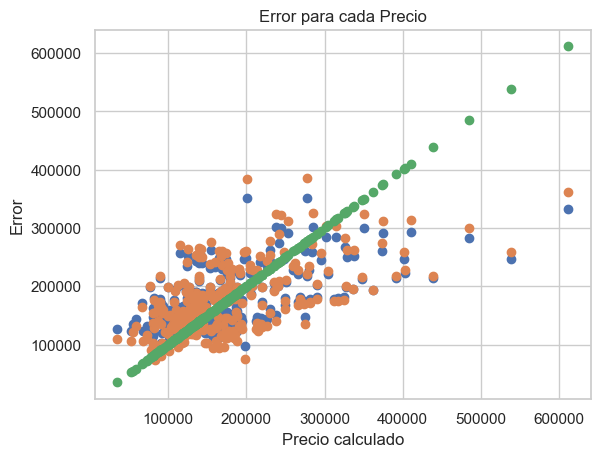

Azul = Modelo Scikit-Learn
Naranja = Modelo Entrenamiento


In [383]:
# error = predicciones2['Promedio'] - predicciones2['Precio Real']

plt.plot(dataset_validacion[:,0], predicciones2['Modelo Scikit-Learn'] , marker='o', linestyle='')
plt.plot(dataset_validacion[:,0], predicciones2['Modelo Entrenamiento'] , marker='o', linestyle='')
plt.plot(dataset_validacion[:,0], dataset_validacion[:,0], marker='o', linestyle='')
plt.title('Error para cada Precio')
plt.xlabel('Precio calculado')
plt.ylabel('Error')
plt.grid(True)
plt.show()

print("Azul = Modelo Scikit-Learn")
print("Naranja = Modelo Entrenamiento")

---
### Entrenamiento usando **OverallQual vs SalePrice**

Utilizamos la función de entrenamiento:

In [392]:
beta_final_OverallQual, errores = entrenar_regresion_lineal(dataset_entrenamiento[:,1], dataset_entrenamiento[:,0], 7700, 700, 0.0255)
print("Parámetros finales del modelo:", beta_final_OverallQual[-1])

Iteración 700: Error = 1209322616.853661, beta: [ 38460.56342025 -52108.18252991]
Iteración 1400: Error = 1172442638.5915945, beta: [ 42284.77043227 -76743.72830589]
Iteración 2100: Error = 1165483319.449657, beta: [ 43945.99919425 -87445.36581696]
Iteración 2800: Error = 1164170083.2385297, beta: [ 44667.63403016 -92094.13822329]
Iteración 3500: Error = 1163922273.1710443, beta: [ 44981.11092649 -94113.55673411]
Iteración 4200: Error = 1163875510.9594734, beta: [ 45117.28473579 -94990.78856337]
Iteración 4900: Error = 1163866686.844888, beta: [ 45176.4383977 -95371.8565184]
Iteración 5600: Error = 1163865021.718376, beta: [ 45202.1346438  -95537.39176405]
Iteración 6300: Error = 1163864707.5059671, beta: [ 45213.29704766 -95609.29998197]
Iteración 7000: Error = 1163864648.2135127, beta: [ 45218.14597615 -95640.53678465]
Iteración 7700: Error = 1163864637.0249186, beta: [ 45220.25234211 -95654.10599648]
Parámetros finales del modelo: [ 45220.25234211 -95654.10599648]


.


Graficamos el listado de errores obtenido con la función anterior para poder analizar cómo cambia el error con cada iteración realizada

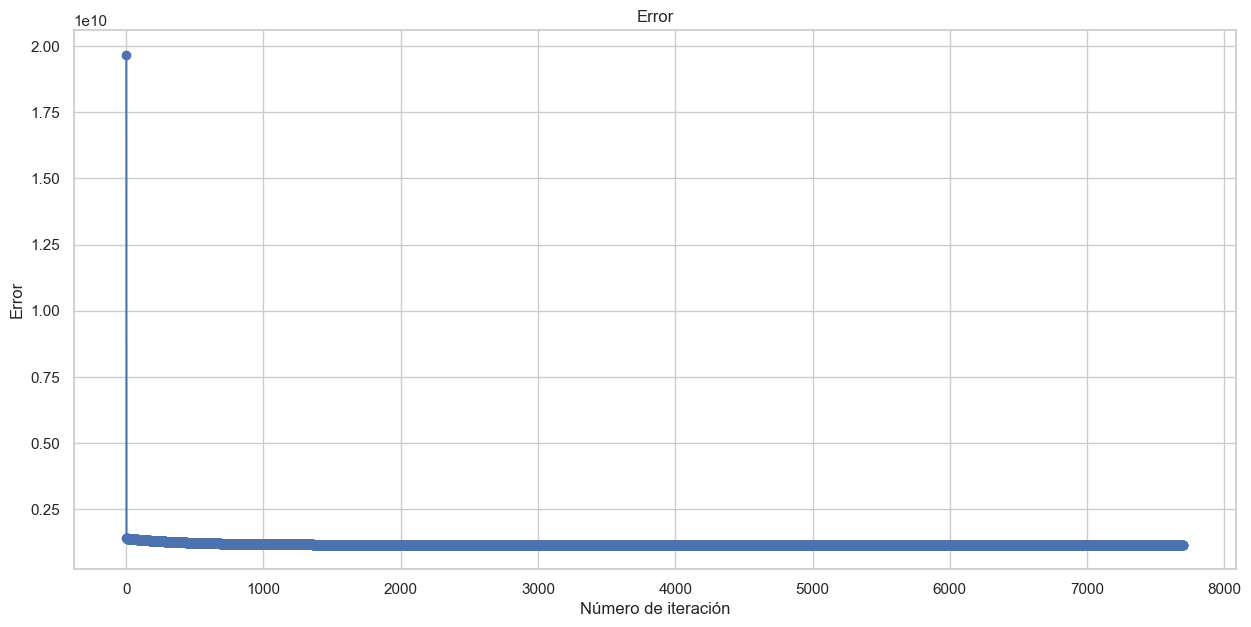

In [368]:
grafic_error(errores)

.

Ahora vamos a observar cómo nuestro modelo va evolucionando con cada iteración realizada:

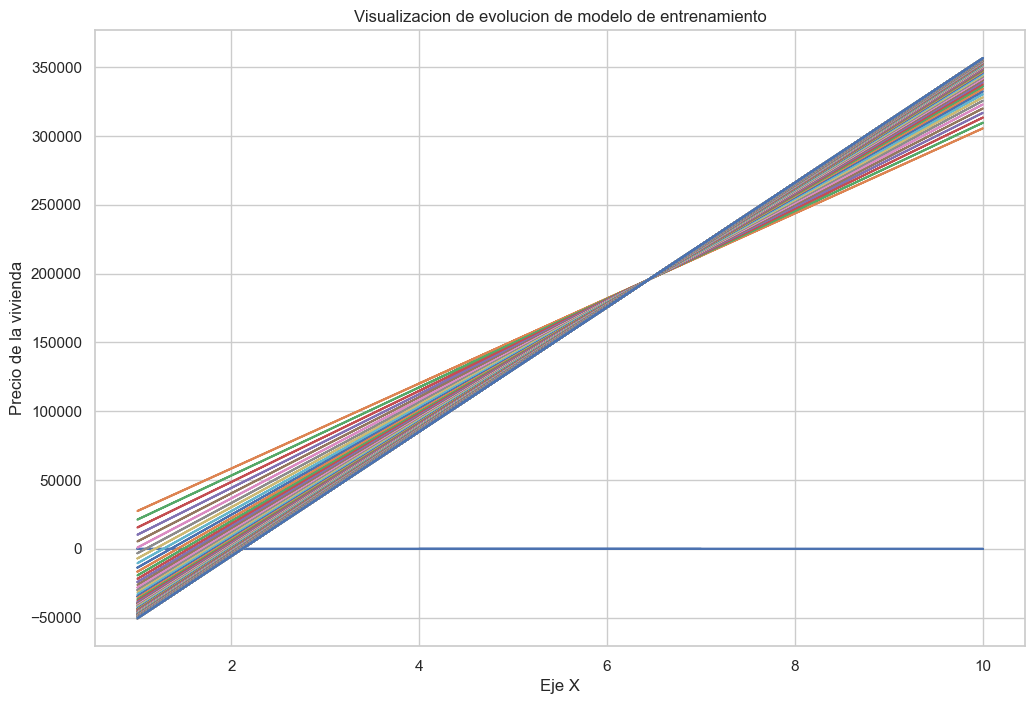

In [369]:
graficar_evolucion_modelo(beta_final_OverallQual,dataset_entrenamiento[:,1], 70)

.

**Utilizando Scikit-Learn:**

Ahora usaremos Scikit-Learn para entrenar de nuevo un modelo de regresion lineal:

In [393]:
nueva = (dataset_entrenamiento[:,1]).reshape(-1, 1)
reg = LinearRegression().fit(nueva, dataset_entrenamiento[:,0])

.

Ahora usaremos el Modelo Entrenado y el Modelo Scikit-Learn para calcular la estimación o predicción resultante de cada uno de los modelos. Devolvemos como resultado la predicción estimada promediando las predicciones de ambos modelos:

In [371]:
predicciones1 = predecir(beta_final_OverallQual[-1], reg, dataset_entrenamiento[:,1])
predicciones1

Modelo entrenamiento beta1 = 45220.252342113745  y beta0 = -95654.10599648255
Modelo Scikit-Learn beta1 = 45221.87009102857  y beta0 = -95664.5275367705
Promedio beta1 = 45221.06121657116  y beta0 = -95659.31676662652


,Modelo Entrenamiento,Modelo Scikit-Learn,Promedio
0,85226.903372,85222.952827,85224.928100
1,130447.155714,130444.822918,130445.989316
2,130447.155714,130444.822918,130445.989316
3,220887.660398,220888.563100,220888.111749
4,130447.155714,130444.822918,130445.989316
...,...,...,...
1163,85226.903372,85222.952827,85224.928100
1164,130447.155714,130444.822918,130445.989316
1165,85226.903372,85222.952827,85224.928100
1166,220887.660398,220888.563100,220888.111749


**Ahora utilizamos los datos de validacion**

In [394]:
predicciones2 = predecir(beta_final_OverallQual[-1], reg, dataset_validacion[:,1])

Modelo entrenamiento beta1 = 45220.252342113745  y beta0 = -95654.10599648255
Modelo Scikit-Learn beta1 = 45221.87009102857  y beta0 = -95664.5275367705
Promedio beta1 = 45221.06121657116  y beta0 = -95659.31676662652


In [395]:
predicciones2['Precio Real'] = dataset_validacion[:,0]
predicciones2['Error Entrenamiento'] = (((predicciones2['Modelo Entrenamiento'] - predicciones2['Precio Real']).abs())/predicciones2['Precio Real'])*100
predicciones2['Error Scikit-Learn'] = (((predicciones2['Modelo Scikit-Learn'] - predicciones2['Precio Real']).abs())/predicciones2['Precio Real'])*100
predicciones2[['Modelo Entrenamiento', 'Precio Real', 'Error Entrenamiento','Modelo Scikit-Learn', 'Precio Real', 'Error Scikit-Learn' ]]

,Modelo Entrenamiento,Precio Real,Error Entrenamiento,Modelo Scikit-Learn,Precio Real,Error Scikit-Learn
0,266107.912740,250000.0,6.443165,266110.433191,250000.0,6.444173
1,266107.912740,325300.0,18.196153,266110.433191,325300.0,18.195379
2,220887.660398,139400.0,58.455997,220888.563100,139400.0,58.456645
3,130447.155714,165500.0,21.179966,130444.822918,165500.0,21.181376
4,130447.155714,153000.0,14.740421,130444.822918,153000.0,14.741946
...,...,...,...,...,...,...
287,130447.155714,124000.0,5.199319,130444.822918,124000.0,5.197438
288,175667.408056,136500.0,28.694072,175666.693009,136500.0,28.693548
289,220887.660398,179600.0,22.988675,220888.563100,179600.0,22.989178
290,130447.155714,157900.0,17.386222,130444.822918,157900.0,17.387699


In [396]:
predicciones2['Error'] = (predicciones2['Modelo Entrenamiento'] - predicciones2['Precio Real'])**2
media_error = predicciones2['Error'].mean()
ERROR1 = media_error/2

predicciones2['Error'] = (predicciones2['Modelo Scikit-Learn'] - predicciones2['Precio Real'])**2
media_error = predicciones2['Error'].mean()
ERROR2 = media_error/2

print('Modelo Entrenamiento ERROR: ', ERROR1)
print('Modelo Scikit-Learn  ERROR: ', ERROR2)

Modelo Entrenamiento ERROR:  1248553808.6607804
Modelo Scikit-Learn  ERROR:  1248552614.0139227


.

Ahora realizamos una grafica entre el valor real en el eje *x* y los valores de prediccioon en el eje *y*. En donde los valores mientras más juntos se encuentren y formen una recta *y = x*, más exactas serán las predicciones

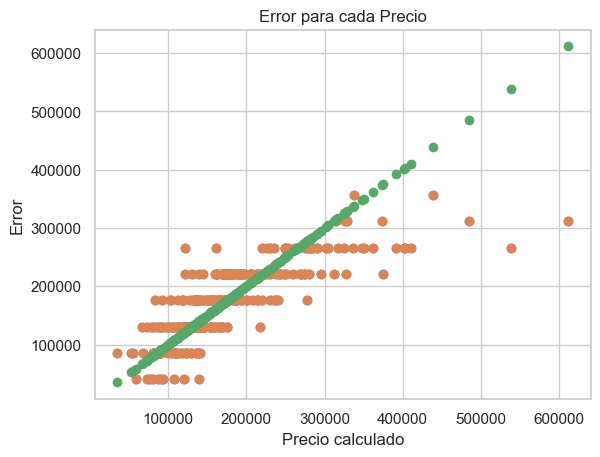

Azul = Modelo Scikit-Learn
Azul = Modelo Entrenamiento


In [377]:
# error = predicciones2['Promedio'] - predicciones2['Precio Real']

plt.plot(dataset_validacion[:,0], predicciones2['Modelo Scikit-Learn'] , marker='o', linestyle='')
plt.plot(dataset_validacion[:,0], predicciones2['Modelo Entrenamiento'] , marker='o', linestyle='')
plt.plot(dataset_validacion[:,0], dataset_validacion[:,0], marker='o', linestyle='')
plt.title('Error para cada Precio')
plt.xlabel('Precio calculado')
plt.ylabel('Error')
plt.grid(True)
plt.show()

print("Azul = Modelo Scikit-Learn")
print("Azul = Modelo Entrenamiento")

---
## **Conclusión:**

En conclusión, el modelo que tiene el error más bajo es con la variable ***OverallQual*** a comparación de *1stFlrSF*

Para ***OverallQual***:
- Modelo Entrenamiento ERROR =  1248553808.6607804
- Modelo Scikit-Learn  ERROR:  1248552614.0139227

Para ***OverallQual***:

In [201]:
!git add Proyecto_19000522.ipynb
!git commit -m "Terminado, solo resta explicar mas a detalle"
!git push --set-upstream origin master

[master bd4cf67] Terminado, solo resta explicar mas a detalle
 1 file changed, 289 insertions(+), 149 deletions(-)
branch 'master' set up to track 'origin/master'.


To https://github.com/ElMangel/Proyecto-1--Regresi-n-con-c-digo.git
   ce922a6..bd4cf67  master -> master


In [307]:
reg.intercept_ #b1 intercepto
reg.coef_[0] # b0 pendiente

-95664.5275367705

Comparar los betas (mi modelo de entrenamietno y el de scikit)

No combinar el resultado de mi modelo con el de scikit

obtener las betas del modelo scikit: model.coef_[0], model.intercept_

Explicar más cada instancia de codigo creada con markdown

RMSE

Para graficar el error Hacer el eje x = precio real, y = precio estimado, como resultado debe mostrar una nube que "va hacia arriba" con cierta inclinacion. Una nube de puntos entre lo real y la estimacion. Si ambos valores son iguales en cada fila, eso nos da como resultado una recta con pendiente = 1, que seria lo mismo que y = x